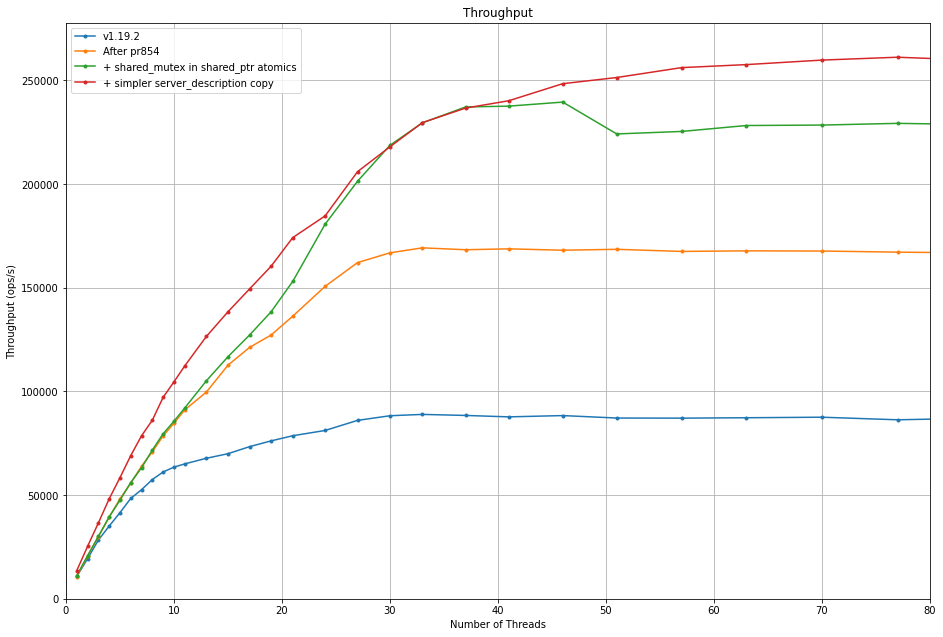

In [19]:
import matplotlib 
%matplotlib inline 

plt = matplotlib.pyplot
fig = plt.figure()
fig.set_facecolor('white')

ax = fig.add_axes([0, 0, 2, 2])

def plot_file(fpath: str, label: str):
    content = __import__('json').loads(open(fpath).read())
    samples: list[Any] = content['samples']
    interval: int = content['interval']
    threads = [el['n_threads'] for el in samples]
    rates = [el['rate'] for el in samples]
    ax.plot(threads, rates, marker='.', label=f'{label}')

ax.set_xlabel('Number of Threads')
ax.set_ylabel('Throughput (ops/s)')
ax.set_title('Throughput')
plot_file('mongoc-v1.19-bench.json', 'v1.19.2')
plot_file('mongoc-pr854-bench.json', 'After pr854')
plot_file('mongoc-sptr-shared_mutex-bench.json', '+ shared_mutex in shared_ptr atomics')
plot_file('mongoc-better-sd-copy-bench.json', '+ simpler server_description copy')
ax.legend()
# plot_file('after2.json', 'After 2')
ax.set_xbound(1, 80)
ax.grid()
ax.set_xlim(0)
ax.set_ylim(0)
fig.set_alpha(1)